# 02 — Exploratory Data Analysis

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Cleaned Data

In [62]:
df = pd.read_csv('../data/processed/otodom_cleaned.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (502, 11)


,price,market,surface,location,advertiser_type,no_of_rooms,form_of_property,is_for_sale,price_per_m2,voivodeship,city
0,549000.0,"[""market"",""secondary""]",41.8,"ul. Komandorska, Borek, Wrocław, dolnośląskie",agency,2.0,NaN,True,13133.971292,NaN,dolnośląskie
1,410000.0,"[""market"",""secondary""]",64.0,"Unieszewo, olsztyński, warmińsko-mazurskie",private,3.0,spółdzielcze wł. prawo do lokalu,True,6406.250000,NaN,NaN
2,129000.0,"[""market"",""secondary""]",92.0,"Nowy Las, Głuchołazy, nyski, opolskie",agency,4.0,pełna własność,True,1402.173913,NaN,opolskie
3,820000.0,"[""market"",""secondary""]",106.0,"Brzesko, Brzesko, brzeski, małopolskie",private,4.0,NaN,True,7735.849057,NaN,małopolskie
4,1399000.0,"[""market"",""primary""]",189.4,"Zelków, Zabierzów, krakowski, małopolskie",agency,5.0,NaN,True,7386.483633,NaN,małopolskie


## Price Distribution

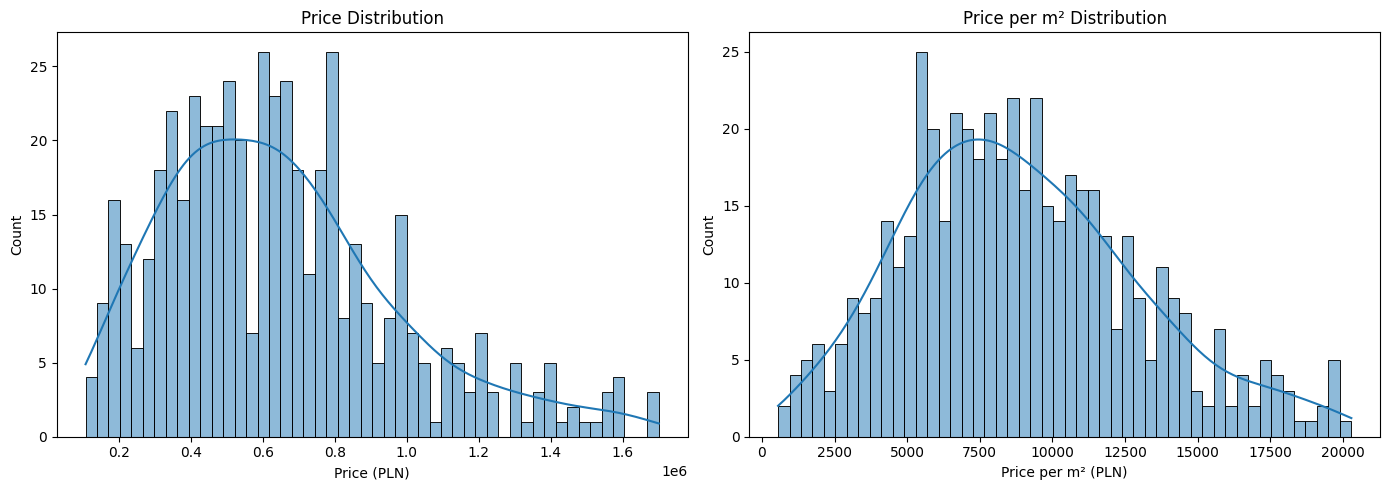

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price (PLN)')

sns.histplot(df['price_per_m2'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Price per m² Distribution')
axes[1].set_xlabel('Price per m² (PLN)')

plt.tight_layout()
plt.savefig('../results/figures/price_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## Price by Voivodeship

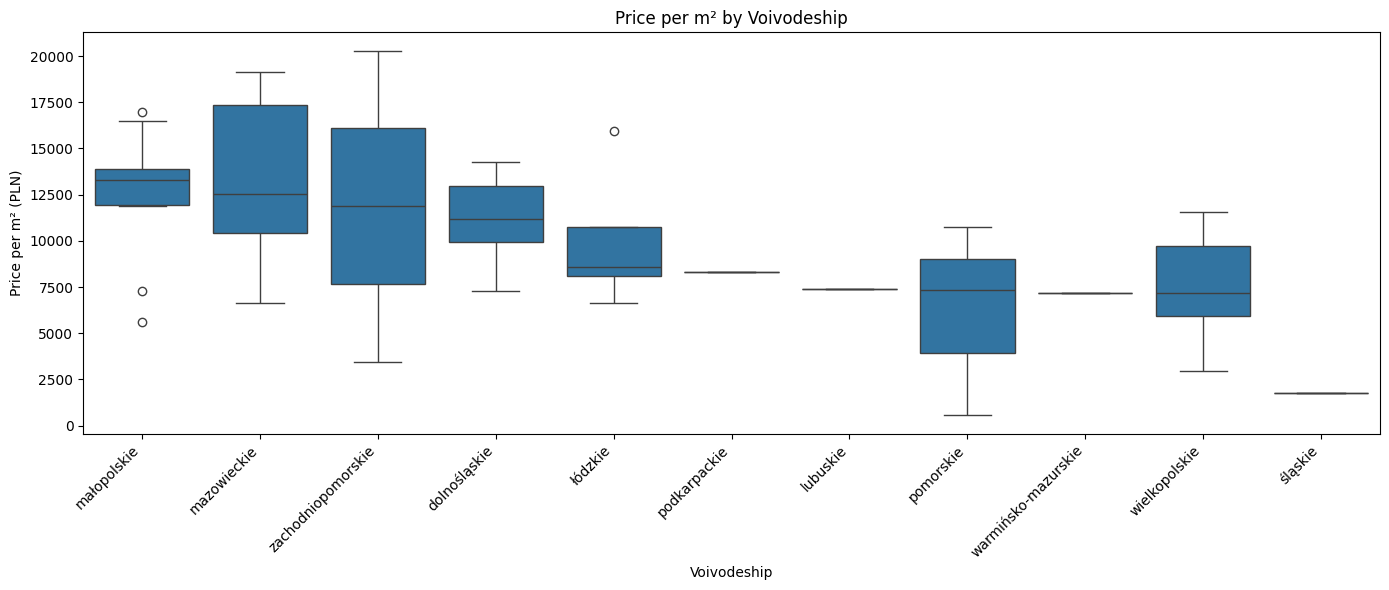

In [64]:
plt.figure(figsize=(14, 6))
order = df.groupby('voivodeship')['price_per_m2'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='voivodeship', y='price_per_m2', order=order)
plt.xticks(rotation=45, ha='right')
plt.title('Price per m² by Voivodeship')
plt.xlabel('Voivodeship')
plt.ylabel('Price per m² (PLN)')
plt.tight_layout()
plt.savefig('../results/figures/price_by_voivodeship.png', dpi=150, bbox_inches='tight')
plt.show()

## Price by Number of Rooms

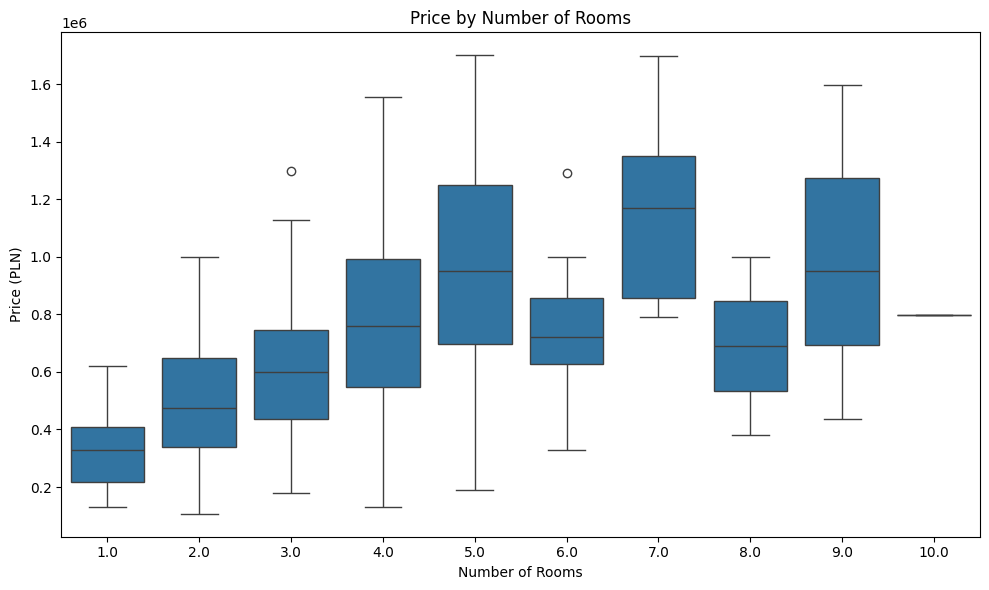

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='no_of_rooms', y='price')
plt.title('Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (PLN)')
plt.tight_layout()
plt.savefig('../results/figures/price_by_rooms.png', dpi=150, bbox_inches='tight')
plt.show()

## Surface vs Price

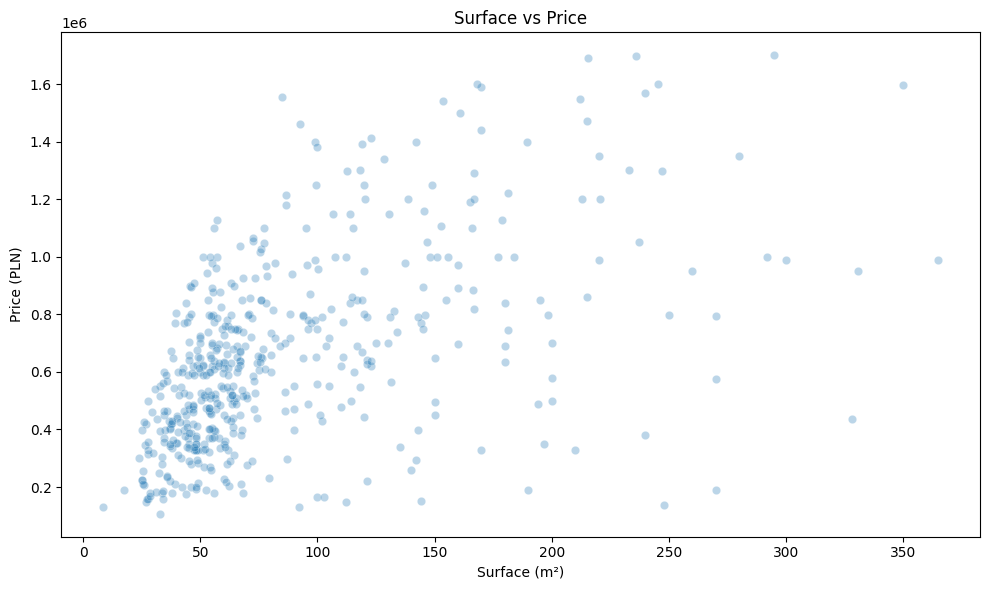

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='surface', y='price', alpha=0.3)
plt.title('Surface vs Price')
plt.xlabel('Surface (m²)')
plt.ylabel('Price (PLN)')
plt.tight_layout()
plt.savefig('../results/figures/surface_vs_price.png', dpi=150, bbox_inches='tight')
plt.show()

## Market Type Distribution

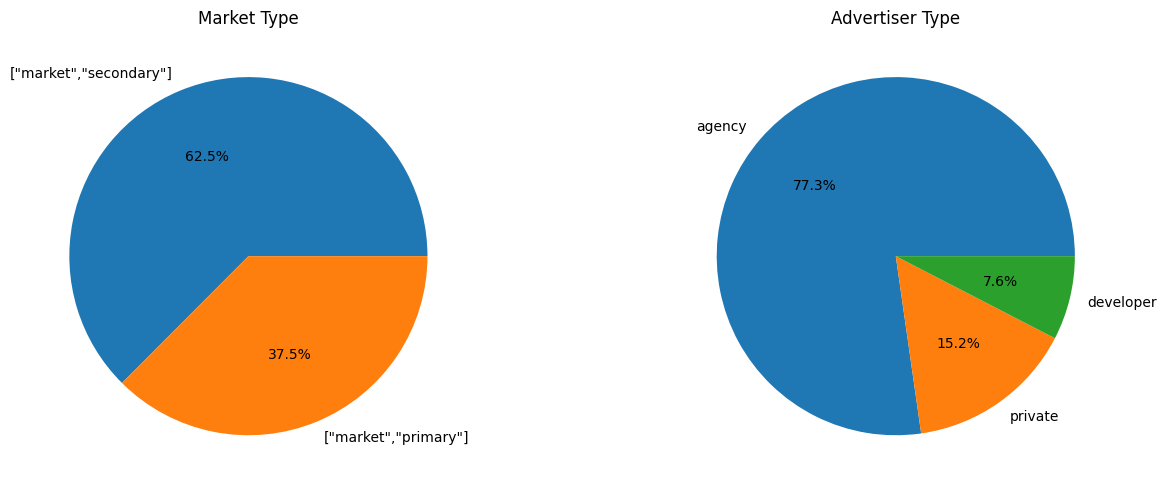

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['market'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Market Type')
axes[0].set_ylabel('')

df['advertiser_type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Advertiser Type')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../results/figures/market_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## Correlation Heatmap

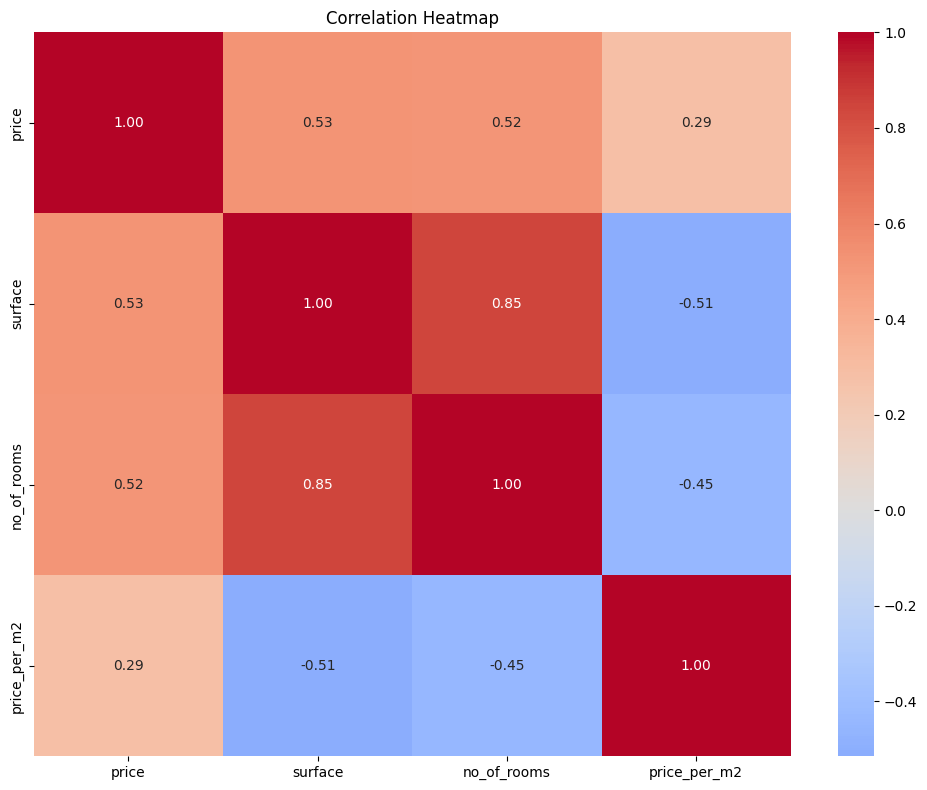

In [68]:
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('../results/figures/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

## Top 10 Cities by Listings

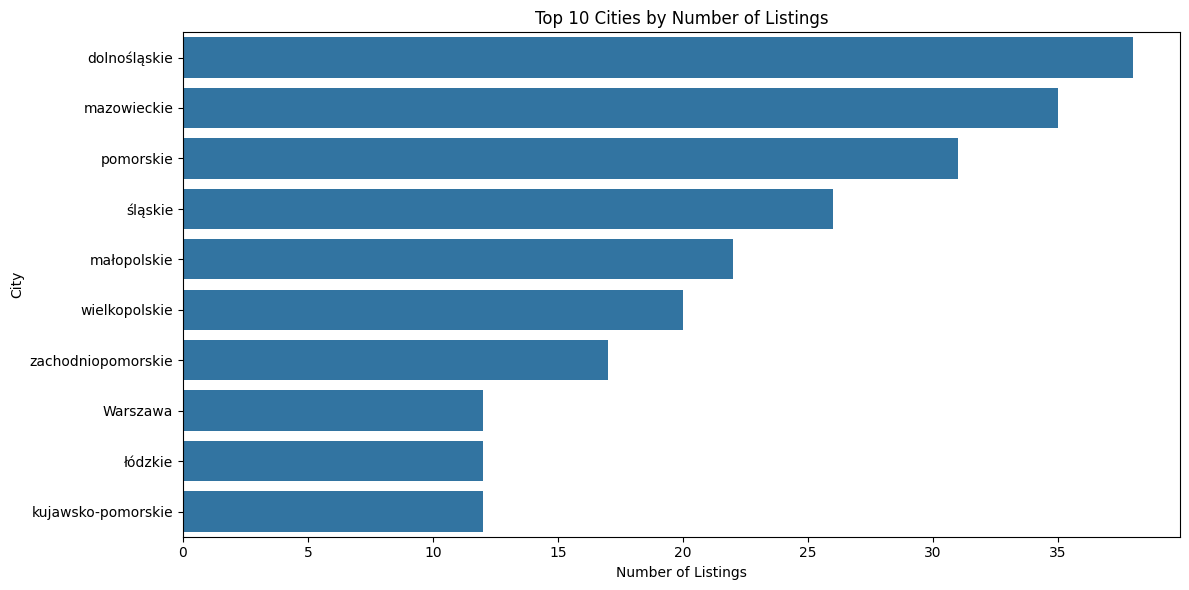

In [69]:
plt.figure(figsize=(12, 6))
top_cities = df['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('../results/figures/top_cities.png', dpi=150, bbox_inches='tight')
plt.show()

## Summary Statistics by Market Type

In [70]:
df.groupby('market')[['price', 'surface', 'price_per_m2']].agg(['mean', 'median', 'count'])

price                    surface               \
                                 mean    median count       mean median count   
market                                                                          
["market","primary"]    658309.157303  612299.5   178  78.358708  63.07   178   
["market","secondary"]  647794.121212  610000.0   297  88.498148  63.56   297   

                       price_per_m2                     
                               mean       median count  
market                                                  
["market","primary"]    9264.995361  8888.629538   178  
["market","secondary"]  8889.201927  7957.692308   297